<a href="https://colab.research.google.com/github/atharvaK718/Exploratory-Data-Analysis/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libarires and Dataset

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/catholic.csv")

# Performing data deduplication

In [28]:
df = df.drop_duplicates()

# Measure of central tendency

In [29]:
numeric_columns = ['read12', 'math12', 'lfaminc']

central_tendency = {}

for col in numeric_columns:
    central_tendency[col] = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode().iloc[0] if not df[col].mode().empty else None
    }

# Convert to DataFrame for easy viewing
central_tendency_df = pd.DataFrame(central_tendency)
print("Measures of Central Tendency:")
print(central_tendency_df)

Measures of Central Tendency:
           read12     math12    lfaminc
Mean    51.772402  52.133623  10.353323
Median  53.080000  52.530000  10.308950
Mode    68.090000  50.730000  10.657260


# Measure of dispersion

In [30]:
dispersion = {}

for col in numeric_columns:
    dispersion[col] = {
        'Standard Deviation': df[col].std(),
        'Variance': df[col].var()
    }

# Convert to DataFrame for easy viewing
dispersion_df = pd.DataFrame(dispersion)
print("Measures of Dispersion:")
print(dispersion_df)

Measures of Dispersion:
                       read12     math12   lfaminc
Standard Deviation   9.407761   9.459117  0.794519
Variance            88.505967  89.474901  0.631260


# Discretization/Binning

In [31]:
df['read12_binned'] = pd.cut(df['read12'], bins=[30, 40, 50, 60, 70, np.inf], labels=['Low', 'Below Average', 'Average', 'Above Average', 'High'])

## Visualize `read12` distribution before and after binning

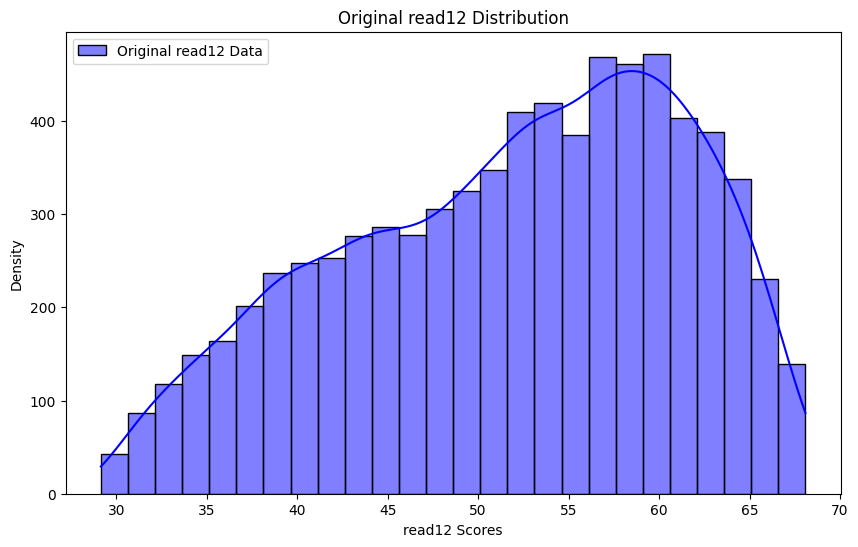

In [32]:
# Plot Original 'read12' Data
plt.figure(figsize=(10, 6))
sns.histplot(df['read12'], kde=True, color="blue", label="Original read12 Data")
plt.legend()
plt.title("Original read12 Distribution")
plt.xlabel("read12 Scores")
plt.ylabel("Density")
plt.show()

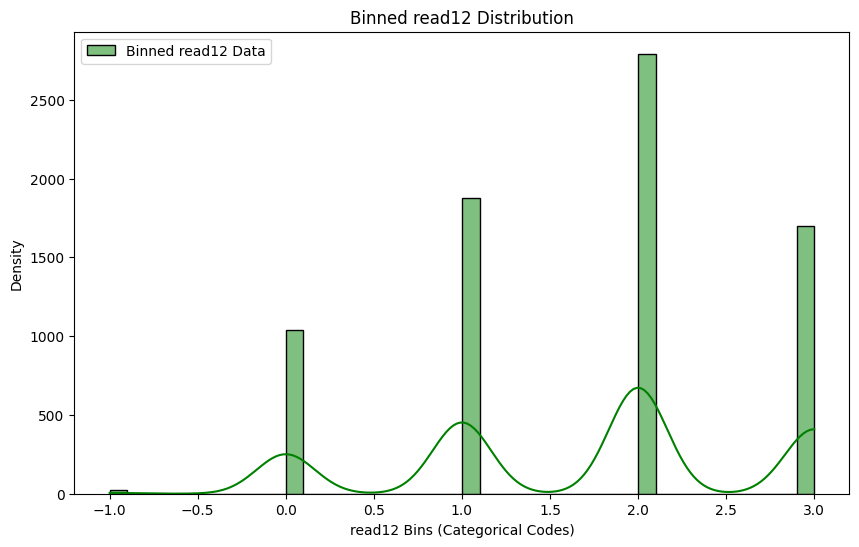

In [33]:
# Plot Binned 'read12' Data
plt.figure(figsize=(10, 6))
sns.histplot(df['read12_binned'].cat.codes, kde=True, color="green", label="Binned read12 Data")
plt.legend()
plt.title("Binned read12 Distribution")
plt.xlabel("read12 Bins (Categorical Codes)")
plt.ylabel("Density")
plt.show()

# Handling Missing Data

In [34]:
# Create separate copies for each imputation method
df_mean_imputed = df.copy()
df_median_imputed = df.copy()
df_zero_imputed = df.copy()

# Impute missing data with Mean, Median, and Zero
numeric_columns = ['read12', 'math12', 'lfaminc']  # Specify numeric columns with missing values

for col in numeric_columns:
    # Impute with mean
    df_mean_imputed[col] = df_mean_imputed[col].fillna(df[col].mean())
    # Impute with median
    df_median_imputed[col] = df_median_imputed[col].fillna(df[col].median())
    # Impute with zero
    df_zero_imputed[col] = df_zero_imputed[col].fillna(0)


## Visualization of Original and Imputed Data for 'read12' column

<Axes: xlabel='read12', ylabel='Density'>

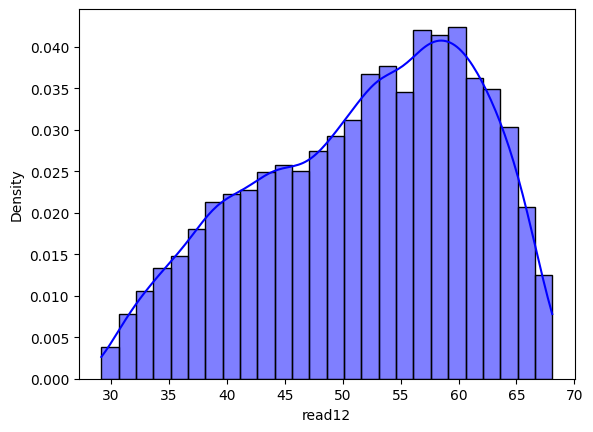

In [35]:
# Plot original data
sns.histplot(df['read12'], kde=True, color="blue", label="Original Data", stat="density")

<Axes: xlabel='read12', ylabel='Density'>

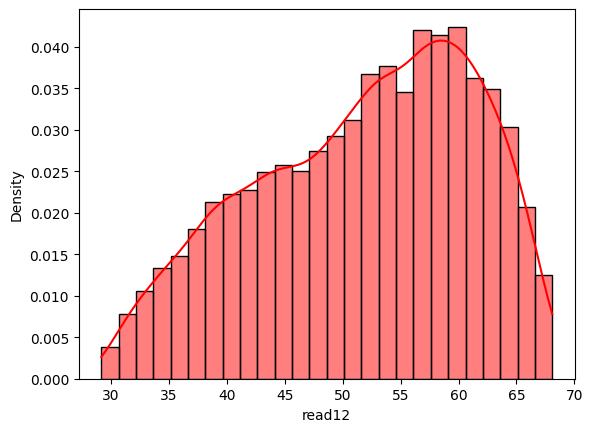

In [36]:
# Plot mean-imputed data
sns.histplot(df_mean_imputed['read12'], kde=True, color="red", label="Mean Imputed", stat="density")

<Axes: xlabel='read12', ylabel='Density'>

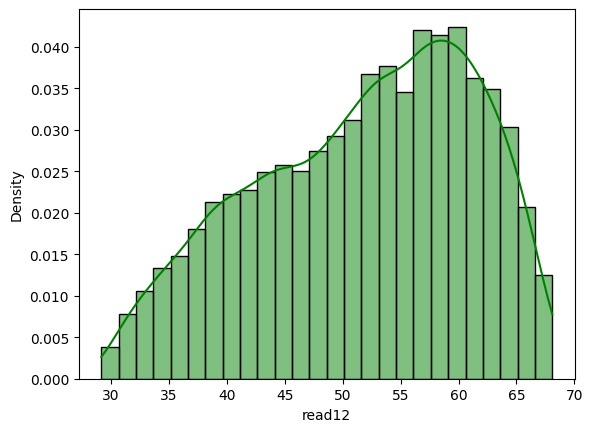

In [37]:
# Plot median-imputed data
sns.histplot(df_median_imputed['read12'], kde=True, color="green", label="Median Imputed", stat="density")


<Axes: xlabel='read12', ylabel='Density'>

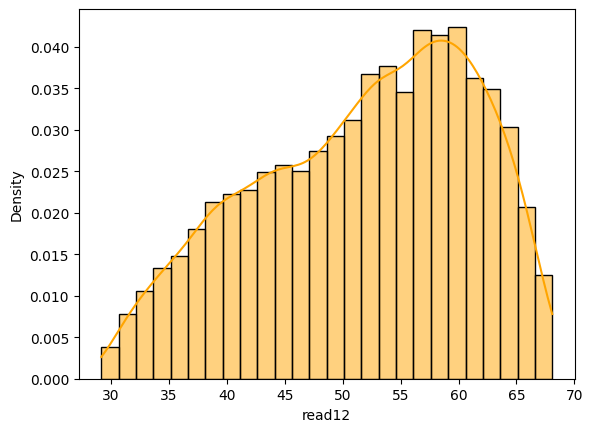

In [38]:
# Plot zero-imputed data
sns.histplot(df_zero_imputed['read12'], kde=True, color="orange", label="Zero Imputed", stat="density")